# Example: Downloading datasets with the `cdsapi`

**Note:** Any changes you make to this notebook will be lost once the page is closed or refreshed. Please download any files you would like to keep.

**Note:** The WASM-based version of the compression lab running inside JupyterLite has only been tested in recent Firefox browsers.

## Installing and configuring the `cdsapi` package

In [1]:
import cdsapi

[pyodide]: Loading cdsapi, cads-api-client, attrs, multiurl, requests, charset-normalizer, idna, urllib3, certifi, tqdm, typing-extensions, setuptools, distutils
[pyodide]: Loaded attrs, cads-api-client, cdsapi, certifi, charset-normalizer, distutils, idna, multiurl, requests, setuptools, tqdm, typing-extensions, urllib3


To run this example, you need your API key (personal access token) available from https://cds-beta.climate.copernicus.eu/profile.

Please enter your API key to set the `CDSAPI_KEY` environment variable in the next cell.

Please remember that you must keep your API key private and should not share a notebook that contains your API key.

In [2]:
import os
os.environ["CDSAPI_URL"] = "https://cds-beta.climate.copernicus.eu/api"
os.environ["CDSAPI_KEY"] = "<CDS-API-KEY>"

## Retrieving the dataset

You can now retrieve the following example GRIB dataset. Once the download has completed, you should have a new `data.grib` file in your local directory.

In [3]:
client = cdsapi.Client()

req = client.retrieve(
    "reanalysis-era5-single-levels",
    {
        "variable": "2t",
        "product_type": "reanalysis",
        "date": "2012-12-01",
        "time": "14:00",
        "format": "netcdf",
    },
)

req.download("t.nc")

2024-09-03 12:58:27,865 INFO Request ID is fb2713d3-b36b-43ae-b3a1-3b9543a5056c
2024-09-03 12:58:28,094 INFO status has been updated to accepted
2024-09-03 12:59:17,969 INFO status has been updated to successful
/lib/python3.11/site-packages/multiurl/base.py:49: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  return tqdm(


't.nc'

In [4]:
import earthkit
import xarray as xr

ds = xr.open_dataset("t.nc")
ds

[pyodide]: Loading earthkit, earthkit-data, cfgrib, click, eccodes, cffi, pycparser, findlibs, xarray, pandas, tzdata, dask, cloudpickle, importlib_metadata, zipp, Jinja2, MarkupSafe, partd, locket, toolz, pyyaml, entrypoints, filelock, jsonschema, pyrsistent, markdown, netcdf4, cftime, h5py, pkgconfig, pdbufr, earthkit-meteo, earthkit-maps, Cartopy, shapely, pyshp, pyproj, geos, scipy, openblas, adjustText, earthkit-plots, plotly, earthkit-regrid
[pyodide]: Loaded Cartopy, Jinja2, MarkupSafe, adjustText, cffi, cfgrib, cftime, click, cloudpickle, dask, earthkit, earthkit-data, earthkit-maps, earthkit-meteo, earthkit-plots, earthkit-regrid, eccodes, entrypoints, filelock, findlibs, geos, h5py, importlib_metadata, jsonschema, locket, markdown, netcdf4, openblas, pandas, partd, pdbufr, pkgconfig, plotly, pycparser, pyproj, pyrsistent, pyshp, pyyaml, scipy, shapely, toolz, tzdata, xarray, zipp


/lib/python3.11/site-packages/earthkit/regrid/utils/caching.py:27: UserWarning: only soft file lock is available
  from filelock import FileLock


<xarray.Dataset>
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2012-12-01T14:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-08-28T20:27 GRIB to CDM+CF via cfgrib-0.9.1...

## Plotting the dataset

We finally plot the loaded dataset. `earthkit` provides the

```python
earthkit.maps.quickplot(
    *data, blueprint=..., units=None, style=None, disjoint=False, show=True, **kwargs
) -> matplotlib.figure.Figure
```

helper function to plot weather and climate maps data.

In this example, we plot the 2-m temperature variable `t2m` from the dataset.

In [5]:
da = ds["t2m"]

/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


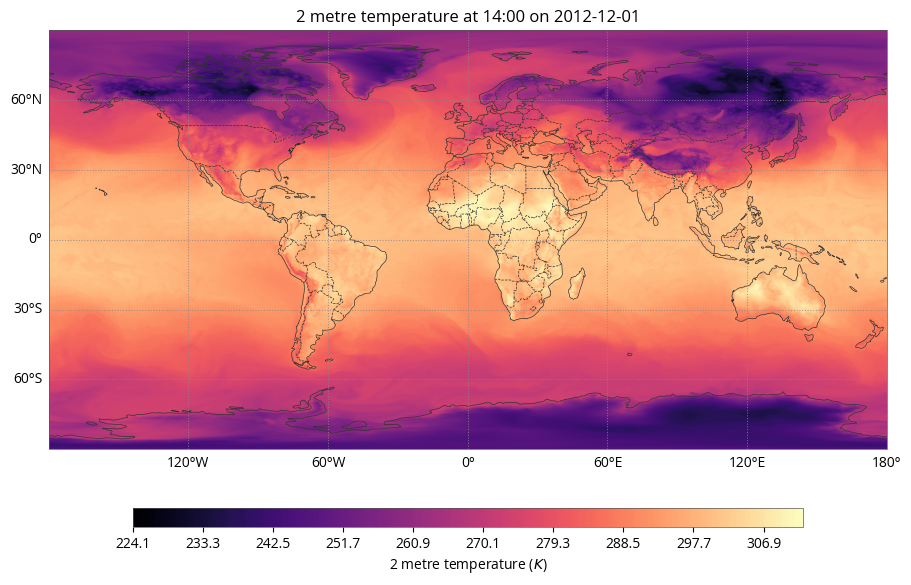

In [6]:
earthkit.maps.quickplot(
    da,
    style=earthkit.maps.Style(
        levels=earthkit.maps.styles.levels.auto_range(da, n_levels=256),
    ),
);